In [1]:

import pandas as pd
from shapely.geometry import  Point
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import cm
import urllib.request
import shutil
import zipfile
import os
import re
# import contextily as ctx
# import geoplot as gplt
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance
from lightgbm import LGBMClassifier
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots
import shap
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

C:\py3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\py3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\py3\

In [2]:
#loading Dataset
df = pd.read_csv("combined_outcomes.csv")      
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Outcome type
0,9e3762eec6e06435db4630b8cfecc43ce4ad7c791e5915...,2018-03,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.502684,51.446260,On or near SKIPPON COURT,E01014920,South Gloucestershire 031E,Investigation complete; no suspect identified
1,9e3762eec6e06435db4630b8cfecc43ce4ad7c791e5915...,2018-03,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.502684,51.446260,On or near SKIPPON COURT,E01014920,South Gloucestershire 031E,Suspect charged
2,093689e3248c259fb2a2bc57a7e3e12b3deb534b2da32a...,2018-03,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.598622,51.493833,On or near CHERINGTON ROAD,E01014633,Bristol 004C,Unable to prosecute suspect
3,5469cc50f826f5b1c768236f024ad716223bfd4fd785fe...,2018-03,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect
4,089bfd1e2bc825b84527b168c53546914099ad45fa44b3...,2018-03,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,NaN,NaN,Unable to prosecute suspect


In [3]:
#checking data information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13013002 entries, 0 to 13013001
Data columns (total 10 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Crime ID      object
 1   Month         object
 2   Reported by   object
 3   Falls within  object
 4   Longitude     object
 5   Latitude      object
 6   Location      object
 7   LSOA code     object
 8   LSOA name     object
 9   Outcome type  object
dtypes: object(10)
memory usage: 992.8+ MB


In [4]:
# cleaning data as every column will have column name (due to merging monthly data sets)
df2 = df[df.Month!= 'Month']

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13011476 entries, 0 to 13013001
Data columns (total 10 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   Crime ID      object
 1   Month         object
 2   Reported by   object
 3   Falls within  object
 4   Longitude     object
 5   Latitude      object
 6   Location      object
 7   LSOA code     object
 8   LSOA name     object
 9   Outcome type  object
dtypes: object(10)
memory usage: 1.1+ GB


In [7]:
#checking Shape of Data 
df2.shape[0] ,df2.shape[1]

(13011476, 10)

In [8]:
df2.rename(columns = {'LSOA code' :'LSOAcode' , 'LSOA name' : 'LSOAname' , 'Outcome type' :'Outcometype' ,'Falls within' : 'Fallswithin' ,'Reported by' : 'Reportedby','Crime ID': 'CrimeId' }, inplace = True)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13011476 entries, 0 to 13013001
Data columns (total 10 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   CrimeId      object
 1   Month        object
 2   Reportedby   object
 3   Fallswithin  object
 4   Longitude    object
 5   Latitude     object
 6   Location     object
 7   LSOAcode     object
 8   LSOAname     object
 9   Outcometype  object
dtypes: object(10)
memory usage: 1.1+ GB


In [10]:
# droping crime ID as its of no use 
df2.drop([ 'CrimeId'], axis=1 , inplace = True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13011476 entries, 0 to 13013001
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Month        object
 1   Reportedby   object
 2   Fallswithin  object
 3   Longitude    object
 4   Latitude     object
 5   Location     object
 6   LSOAcode     object
 7   LSOAname     object
 8   Outcometype  object
dtypes: object(9)
memory usage: 992.7+ MB


In [11]:
#data scleaning
df2.Longitude = df2.Longitude.astype(float)
df2.Latitude = df2.Latitude.astype(float)
df2['Month'] = pd.to_datetime(df2.Month)
df2['Location'] = df2.Location.astype('category')
df2['Reportedby'] = df2.Reportedby.astype('category')
df2['mon'] = pd.DatetimeIndex(df2['Month']).month

In [12]:
df2.Fallswithin.value_counts()

Metropolitan Police Service       1558833
West Yorkshire Police              820532
West Midlands Police               770350
Kent Police                        538581
Greater Manchester Police          474505
Thames Valley Police               469243
Essex Police                       464522
Hampshire Constabulary             461255
Merseyside Police                  408768
South Yorkshire Police             376554
Sussex Police                      339604
Northumbria Police                 315435
South Wales Police                 313067
Nottinghamshire Police             304510
Devon & Cornwall Police            279736
Humberside Police                  279732
Leicestershire Police              269210
Avon and Somerset Constabulary     263054
Staffordshire Police               259493
Lancashire Constabulary            255492
Cheshire Constabulary              242973
West Mercia Police                 238631
Hertfordshire Constabulary         234906
Dorset Police                     

In [13]:
df2['Fallswithin'] = df2.Fallswithin.astype('category')

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13011476 entries, 0 to 13013001
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Month        datetime64[ns]
 1   Reportedby   category      
 2   Fallswithin  category      
 3   Longitude    float64       
 4   Latitude     float64       
 5   Location     category      
 6   LSOAcode     object        
 7   LSOAname     object        
 8   Outcometype  object        
 9   mon          float64       
dtypes: category(3), datetime64[ns](1), float64(3), object(3)
memory usage: 878.6+ MB


In [15]:
df2['LSOAcode'] = df2.LSOAcode.astype('str')

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13011476 entries, 0 to 13013001
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Month        datetime64[ns]
 1   Reportedby   category      
 2   Fallswithin  category      
 3   Longitude    float64       
 4   Latitude     float64       
 5   Location     category      
 6   LSOAcode     object        
 7   LSOAname     object        
 8   Outcometype  object        
 9   mon          float64       
dtypes: category(3), datetime64[ns](1), float64(3), object(3)
memory usage: 878.6+ MB


In [17]:
df2.LSOAname.value_counts()

Leeds 111B                           18848
Leicester 041A                       14217
City of London 001F                  11863
Birmingham 138A                      10730
Derby 013F                           10004
                                     ...  
Gateshead 017B                          16
Newham 034G                             13
Central Bedfordshire 023B               12
Northumberland 020C                     11
Bath and North East Somerset 003A        8
Name: LSOAname, Length: 34749, dtype: int64

In [18]:
df2['LSOAcode'] = df2.LSOAcode.astype('str')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13011476 entries, 0 to 13013001
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Month        datetime64[ns]
 1   Reportedby   category      
 2   Fallswithin  category      
 3   Longitude    float64       
 4   Latitude     float64       
 5   Location     category      
 6   LSOAcode     object        
 7   LSOAname     object        
 8   Outcometype  object        
 9   mon          float64       
dtypes: category(3), datetime64[ns](1), float64(3), object(3)
memory usage: 878.6+ MB


In [19]:
df2.Outcometype.value_counts()

Investigation complete; no suspect identified          5872720
Unable to prosecute suspect                            4484440
Suspect charged                                        1285339
Local resolution                                        340140
Offender given a caution                                197284
Further investigation is not in the public interest     165937
Action to be taken by another organisation              142628
Formal action is not in the public interest             122210
Offender sent to prison                                  75319
Offender given community sentence                        58923
Offender given a drugs possession warning                53094
Offender given penalty notice                            36989
Offender fined                                           33405
Defendant found not guilty                               27810
Offender given suspended prison sentence                 23315
Offender given conditional discharge                   

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13011476 entries, 0 to 13013001
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Month        datetime64[ns]
 1   Reportedby   category      
 2   Fallswithin  category      
 3   Longitude    float64       
 4   Latitude     float64       
 5   Location     category      
 6   LSOAcode     object        
 7   LSOAname     object        
 8   Outcometype  object        
 9   mon          float64       
dtypes: category(3), datetime64[ns](1), float64(3), object(3)
memory usage: 878.6+ MB


In [21]:
df2.head(5)

,Month,Reportedby,Fallswithin,Longitude,Latitude,Location,LSOAcode,LSOAname,Outcometype,mon
0,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.502684,51.446260,On or near SKIPPON COURT,E01014920,South Gloucestershire 031E,Investigation complete; no suspect identified,3.0
1,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.502684,51.446260,On or near SKIPPON COURT,E01014920,South Gloucestershire 031E,Suspect charged,3.0
2,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.598622,51.493833,On or near CHERINGTON ROAD,E01014633,Bristol 004C,Unable to prosecute suspect,3.0
3,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,nan,NaN,Unable to prosecute suspect,3.0
4,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,NaN,NaN,No location,nan,NaN,Unable to prosecute suspect,3.0


In [22]:
#function for plotting cordinates
def create_gdf(df):
    gdf = df.copy()
    gdf['Coordinates'] = list(zip(gdf.Latitude, gdf.Longitude))
    gdf.Coordinates = gdf.Coordinates.apply(Point)
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})
    return gdf

In [23]:
df2.drop_duplicates(inplace=True)

In [24]:
# train_gdf = create_gdf(df2)
# world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# ax = world.plot(color='white', edgecolor='black')
# train_gdf.plot(ax=ax, color='red')
# plt.show()

In [25]:
df2.replace({'Latitude': 51.5095, 'Longitude': -0.1245}, np.NaN, inplace=True)

In [26]:
df2.dropna(inplace = True)

In [27]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8157257 entries, 0 to 13012998
Data columns (total 10 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Month        datetime64[ns]
 1   Reportedby   category      
 2   Fallswithin  category      
 3   Longitude    float64       
 4   Latitude     float64       
 5   Location     category      
 6   LSOAcode     object        
 7   LSOAname     object        
 8   Outcometype  object        
 9   mon          float64       
dtypes: category(3), datetime64[ns](1), float64(3), object(3)
memory usage: 554.5+ MB


df2.head(5)

In [28]:
df2.head(5)

,Month,Reportedby,Fallswithin,Longitude,Latitude,Location,LSOAcode,LSOAname,Outcometype,mon
0,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.502684,51.446260,On or near SKIPPON COURT,E01014920,South Gloucestershire 031E,Investigation complete; no suspect identified,3.0
1,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.502684,51.446260,On or near SKIPPON COURT,E01014920,South Gloucestershire 031E,Suspect charged,3.0
2,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.598622,51.493833,On or near CHERINGTON ROAD,E01014633,Bristol 004C,Unable to prosecute suspect,3.0
8,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.893176,50.854161,On or near BAKERSFIELD,E01029230,South Somerset 024D,Unable to prosecute suspect,3.0
22,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.498926,51.472468,On or near SWEETS ROAD,E01014956,South Gloucestershire 025B,Unable to prosecute suspect,3.0


In [29]:
df2.shape[0] ,df2.shape[1]

(8157257, 10)

In [30]:
df2.Outcometype.value_counts()

Investigation complete; no suspect identified          3553708
Unable to prosecute suspect                            2777763
Suspect charged                                         748895
Local resolution                                        264270
Offender given a caution                                153702
Further investigation is not in the public interest     133519
Action to be taken by another organisation              103645
Formal action is not in the public interest              96940
Offender sent to prison                                  54172
Offender given a drugs possession warning                46481
Offender given community sentence                        45828
Offender given penalty notice                            33022
Offender fined                                           29199
Defendant found not guilty                               23494
Offender given suspended prison sentence                 18551
Offender given conditional discharge                   

In [31]:
#creating outcome data as categorical
df2['Outcometype'].replace(['Suspect charged', 'Local resolution', 'Action to be taken by another organisation' ,'Offender sent to prison','Offender given a drugs possession warning','Offender given community sentence','Offender given penalty notice','Offender fined','Offender given suspended prison sentence','Suspect charged as part of another case','Offender otherwise dealt with','Offender ordered to pay compensation','Offender deprived of property','Defendant sent to Crown Court' ], 1, inplace = True)

In [32]:
df2['Outcometype'].replace(['Investigation complete; no suspect identified', 'Unable to prosecute suspect','Offender given a caution','Further investigation is not in the public interest','Formal action is not in the public interest','Defendant found not guilty','Offender given conditional discharge','Court case unable to proceed','Further action is not in the public interest','Offender given absolute discharge'], 0, inplace = True)

In [33]:
df2.Outcometype.value_counts()

0    6788315
1    1368942
Name: Outcometype, dtype: int64

In [34]:
df2['Year'] = df2['Month'].dt.year

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8157257 entries, 0 to 13012998
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Month        datetime64[ns]
 1   Reportedby   category      
 2   Fallswithin  category      
 3   Longitude    float64       
 4   Latitude     float64       
 5   Location     category      
 6   LSOAcode     object        
 7   LSOAname     object        
 8   Outcometype  int64         
 9   mon          float64       
 10  Year         int64         
dtypes: category(3), datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 616.7+ MB


In [36]:
df2['Block'] = df2['Location'].str.contains('block', case=False)

In [37]:
df2.head(10)

,Month,Reportedby,Fallswithin,Longitude,Latitude,Location,LSOAcode,LSOAname,Outcometype,mon,Year,Block
0,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.502684,51.446260,On or near SKIPPON COURT,E01014920,South Gloucestershire 031E,0,3.0,2018,False
1,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.502684,51.446260,On or near SKIPPON COURT,E01014920,South Gloucestershire 031E,1,3.0,2018,False
2,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.598622,51.493833,On or near CHERINGTON ROAD,E01014633,Bristol 004C,0,3.0,2018,False
8,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.893176,50.854161,On or near BAKERSFIELD,E01029230,South Somerset 024D,0,3.0,2018,False
22,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.498926,51.472468,On or near SWEETS ROAD,E01014956,South Gloucestershire 025B,0,3.0,2018,False
36,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.744599,50.947449,On or near Parking Area,E01029191,South Somerset 017C,0,3.0,2018,False
46,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-3.096854,51.013689,On or near SILVER STREET,E01029301,Taunton Deane 010D,0,3.0,2018,False
57,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.478811,51.413145,On or near ASHMEAD ROAD,E01014398,Bath and North East Somerset 003D,1,3.0,2018,False
58,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.676505,51.488860,On or near PEMBROKE ROAD,E01014495,Bristol 008D,0,3.0,2018,False
69,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.477411,51.460977,On or near CHAPEL LANE,E01033339,South Gloucestershire 019G,1,3.0,2018,False


In [38]:
#creating new column
df2['n_days'] = (df2['Month'] - df2['Month'].min()).apply(lambda x: x.days)

In [39]:
df2.head()

,Month,Reportedby,Fallswithin,Longitude,Latitude,Location,LSOAcode,LSOAname,Outcometype,mon,Year,Block,n_days
0,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.502684,51.446260,On or near SKIPPON COURT,E01014920,South Gloucestershire 031E,0,3.0,2018,False,0
1,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.502684,51.446260,On or near SKIPPON COURT,E01014920,South Gloucestershire 031E,1,3.0,2018,False,0
2,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.598622,51.493833,On or near CHERINGTON ROAD,E01014633,Bristol 004C,0,3.0,2018,False,0
8,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.893176,50.854161,On or near BAKERSFIELD,E01029230,South Somerset 024D,0,3.0,2018,False,0
22,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.498926,51.472468,On or near SWEETS ROAD,E01014956,South Gloucestershire 025B,0,3.0,2018,False,0


In [40]:
#creating new columns samepolice
df2['Samepolice'] = np.where(df2['Reportedby'] == df2['Fallswithin'], 1,0)

In [41]:
df2.head()

,Month,Reportedby,Fallswithin,Longitude,Latitude,Location,LSOAcode,LSOAname,Outcometype,mon,Year,Block,n_days,Samepolice
0,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.502684,51.446260,On or near SKIPPON COURT,E01014920,South Gloucestershire 031E,0,3.0,2018,False,0,1
1,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.502684,51.446260,On or near SKIPPON COURT,E01014920,South Gloucestershire 031E,1,3.0,2018,False,0,1
2,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.598622,51.493833,On or near CHERINGTON ROAD,E01014633,Bristol 004C,0,3.0,2018,False,0,1
8,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.893176,50.854161,On or near BAKERSFIELD,E01029230,South Somerset 024D,0,3.0,2018,False,0,1
22,2018-03-01,Avon and Somerset Constabulary,Avon and Somerset Constabulary,-2.498926,51.472468,On or near SWEETS ROAD,E01014956,South Gloucestershire 025B,0,3.0,2018,False,0,1


In [42]:
df2.n_days.value_counts()

214     284354
306     270464
245     265138
731     258552
122     257453
365     256502
153     256070
184     248930
762     247667
976     243324
337     241505
945     237071
275     234470
426     231701
396     231132
915     230145
853     229152
823     225681
792     221528
1037    219209
92      219038
457     218909
671     218070
579     217480
61      215247
884     214932
487     213531
610     210991
549     207252
518     202540
1068    201935
640     197797
1006    197779
702     196404
31      195012
0       140292
Name: n_days, dtype: int64

In [43]:
df2['DayOfWeek'] = df2['Month'].dt.weekday

In [44]:
df2['Day'] = df2['Month'].dt.day

In [45]:
df2.Block.value_counts()

False    8157090
True         167
Name: Block, dtype: int64

In [46]:
#dropping unwanted data columns
df2.drop(columns=['Month','Location','LSOAname','LSOAcode', 'Latitude' , 'Longitude' ], inplace=True)

In [47]:
df2.head()

,Reportedby,Fallswithin,Outcometype,mon,Year,Block,n_days,Samepolice,DayOfWeek,Day
0,Avon and Somerset Constabulary,Avon and Somerset Constabulary,0,3.0,2018,False,0,1,3,1
1,Avon and Somerset Constabulary,Avon and Somerset Constabulary,1,3.0,2018,False,0,1,3,1
2,Avon and Somerset Constabulary,Avon and Somerset Constabulary,0,3.0,2018,False,0,1,3,1
8,Avon and Somerset Constabulary,Avon and Somerset Constabulary,0,3.0,2018,False,0,1,3,1
22,Avon and Somerset Constabulary,Avon and Somerset Constabulary,0,3.0,2018,False,0,1,3,1


In [48]:
le1 = LabelEncoder()

In [49]:
#transforming data using label encoder
df2['Reportedby'] = le1.fit_transform(df2['Reportedby'])
df2['Fallswithin'] = le1.fit_transform(df2['Fallswithin'])
df2['Block'] = le1.fit_transform(df2['Block'])


In [50]:
#Saving a copy of data before splitting
df3 = df2.copy(deep = True)
df3.head()

,Reportedby,Fallswithin,Outcometype,mon,Year,Block,n_days,Samepolice,DayOfWeek,Day
0,0,0,0,3.0,2018,0,0,1,3,1
1,0,0,1,3.0,2018,0,0,1,3,1
2,0,0,0,3.0,2018,0,0,1,3,1
8,0,0,0,3.0,2018,0,0,1,3,1
22,0,0,0,3.0,2018,0,0,1,3,1


In [51]:
# df2 = df3.copy()
# df3.head()

In [52]:
df2.head(10)
# le2 = LabelEncoder()
y = df2.pop('Outcometype')

In [53]:
df2.head()
y[:5]

0     0
1     1
2     0
8     0
22    0
Name: Outcometype, dtype: int64

In [54]:
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(df2, y, test_size=0.2, random_state=10)


In [ ]:
#runnning every model 1 by 1 and cehck the outputs

In [54]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LogisticRegression()) #step2 - classifier
])


In [55]:


scores = cross_validate(pipeline, X_train, y_train)
scores

{'fit_time': array([9.4090209 , 8.70100665, 8.56100225]),
 'score_time': array([0.51500821, 0.47698808, 0.51100349]),
 'test_score': array([0.8321472 , 0.83214758, 0.83214758])}

In [56]:
scores['test_score'].mean()

0.8321474515405004

In [60]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', KNeighborsClassifier(n_neighbors=3)) #step2 - classifier
])

In [ ]:
scores = cross_validate(pipeline, X_train, y_train)
scores

In [ ]:
scores['test_score'].mean()

In [58]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', DecisionTreeClassifier()) #step2 - classifier
])

In [59]:
scores = cross_validate(pipeline, X_train, y_train)
scores

{'fit_time': array([31.36967993, 31.06199884, 29.87000036]),
 'score_time': array([0.74499989, 0.74299836, 0.73400021]),
 'test_score': array([0.83893486, 0.838881  , 0.83883319])}

In [60]:
scores['test_score'].mean()

0.8388830190218917

In [61]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', RandomForestClassifier()) #step2 - classifier
])

In [62]:
scores = cross_validate(pipeline, X_train, y_train)
scores

{'fit_time': array([120.08599782, 114.92930532, 118.46599245]),
 'score_time': array([3.93299961, 3.97797728, 3.93100405]),
 'test_score': array([0.83893532, 0.838881  , 0.83883365])}

In [63]:
scores['test_score'].mean()

0.8388833254974678

In [64]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', GradientBoostingClassifier()) #step2 - classifier
])

In [ ]:
scores = cross_validate(pipeline, X_train, y_train)
scores

In [ ]:
scores['test_score'].mean()

In [57]:
pipeline = Pipeline([
    ('normalizer', StandardScaler()), #Step1 - normalize data
    ('clf', LGBMClassifier()) #step2 - classifier
])

In [58]:
scores = cross_validate(pipeline, X_train, y_train)
scores

{'fit_time': array([18.53575754, 15.61999607, 16.78067994]),
 'score_time': array([2.22600412, 2.21000361, 2.22300124]),
 'test_score': array([0.83893486, 0.83888192, 0.83883595])}

In [59]:
scores['test_score'].mean()

0.8388842449244779

In [60]:
from sklearn.model_selection import GridSearchCV
pipeline.set_params(clf= LGBMClassifier())
pipeline.steps

[('normalizer', StandardScaler(copy=True, with_mean=True, with_std=True)),
 ('clf',
  LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                 importance_type='split', learning_rate=0.1, max_depth=-1,
                 min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                 n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                 random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                 subsample=1.0, subsample_for_bin=200000, subsample_freq=0))]

In [63]:
#hyper parameter tuning
cv_grid = GridSearchCV(pipeline, param_grid = {
    'clf__boosting' : ['gbdt'],
    'clf__objective' : ['binary', 'multinomial'],
    'clf__numclass' : [2] ,
    'clf__max_delta_step':[0.9],
    'clf__min_data_in_leaf': [21, 40],
    'clf__learning_rate': [0.4 , 0.001, 0.001],
    'clf__max_bin': [465],
    'clf__num_leaves': [41]
})

cv_grid.fit(X_train, y_train)

[LightGBM] [Warning] Unknown parameter: numclass
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] Unknown parameter: numclass
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] Unknown parameter: numclass
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] Unknown parameter: numclass
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[Light

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('normalizer',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('clf',
                                        LGBMClassifier(boosting_type='gbdt',
                                                       class_weight=None,
                                                       colsample_bytree=1.0,
                                                       importance_type='split',
                                                       learning_rate=0.1,
                                                       max_depth=-1,
                                                       min_child_samples=20,
                                                       min_c

In [64]:
cv_grid.best_params_

{'clf__boosting': 'gbdt',
 'clf__learning_rate': 0.4,
 'clf__max_bin': 465,
 'clf__max_delta_step': 0.9,
 'clf__min_data_in_leaf': 21,
 'clf__num_leaves': 41,
 'clf__numclass': 2,
 'clf__objective': 'binary'}

In [65]:
cv_grid.best_estimator_

Pipeline(memory=None,
         steps=[('normalizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf',
                 LGBMClassifier(boosting='gbdt', boosting_type='gbdt',
                                class_weight=None, colsample_bytree=1.0,
                                importance_type='split', learning_rate=0.4,
                                max_bin=465, max_delta_step=0.9, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_data_in_leaf=21, min_split_gain=0.0,
                                n_estimators=100, n_jobs=-1, num_leaves=41,
                                numclass=2, objective='binary',
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, silent=True, subsample=1.0,
                                subsample_for_bin=200000, subsample_freq=0))],
         verbose=False)

In [66]:
cv_grid.best_score_

0.8388842449322345

In [67]:
y_predict = cv_grid.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of the best classifier after CV is %.3f%%' % (accuracy*100))

Accuracy of the best classifier after CV is 83.901%


In [74]:
 from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(y_test, y_predict)

array([[1356022,    1861],
       [ 260780,   12789]], dtype=int64)

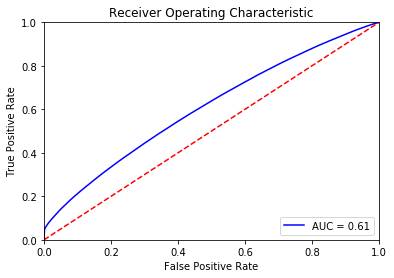

In [77]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = cv_grid.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()